<a href="https://colab.research.google.com/github/kusoksaxara/test-assignment/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Анализ NWOE и NIV для ATE

Датасет содержит 13 миллионов строк, каждая из которых представляет одного пользователя с 12 признаками, индикатором воздействия (treatment) и двумя бинарными метками — визитами (visits) и конверсиями (conversions). Положительные метки означают, что пользователь посетил или совершил конверсию на сайте рекламодателя в течение тестового периода (2 недели).

Описание признаков:

* f0, f1, ..., f11 — значения признаков (непрерывные, тип float)

* treatment — принадлежность к группе воздействия (1 = воздействие применено, 0 = контрольная группа)

* conversion — произошла ли конверсия у пользователя (бинарная метка)

* visit — состоялся ли визит пользователя (бинарная метка)

* exposure — эффект воздействия, то есть был ли пользователь фактически подвержен воздействию (бинарная переменная)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/criteo-uplift-v2.1.csv')

In [4]:
data.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
5,12.616365,10.059654,8.904507,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
6,12.616365,10.059654,8.783340,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
7,12.616365,10.059654,8.964528,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
8,12.616365,10.059654,9.037809,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
9,12.616365,10.059654,9.015128,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


## ⚙️ EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [9]:
print(data.describe())

                 f0            f1            f2            f3            f4  \
count  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07   
mean   1.962030e+01  1.006998e+01  8.446582e+00  4.178923e+00  1.033884e+01   
std    5.377464e+00  1.047557e-01  2.993161e-01  1.336645e+00  3.433081e-01   
min    1.261636e+01  1.005965e+01  8.214383e+00 -8.398387e+00  1.028053e+01   
25%    1.261636e+01  1.005965e+01  8.214383e+00  4.679882e+00  1.028053e+01   
50%    2.192341e+01  1.005965e+01  8.214383e+00  4.679882e+00  1.028053e+01   
75%    2.443646e+01  1.005965e+01  8.723335e+00  4.679882e+00  1.028053e+01   
max    2.674526e+01  1.634419e+01  9.051962e+00  4.679882e+00  2.112351e+01   

                 f5            f6            f7            f8            f9  \
count  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07   
mean   4.028513e+00 -4.155356e+00  5.101765e+00  3.933581e+00  1.602764e+01   
std    4.310974e-01  4.577914e+00  1.205248e+00  5.

In [6]:
print('Total number of samples: {}'.format(len(data)))

Total number of samples: 13979592


In [11]:
print(data.isnull().sum())

f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64


In [8]:
data['treatment'].value_counts(normalize = True)

,proportion
treatment,
1,0.85
0,0.15


Датасет несбалансирован: примерно 85% пользователей относятся к группе с воздействием, а лишь 15% — к контрольной группе.

In [12]:
print('Percentage of users that visit: {}%'.format(100*round(data['visit'].mean(),4)))
print('Percentage of users that convert: {}%'.format(100*round(data['conversion'].mean(),4)))
print('Percentage of visitors that convert: {}%'.format(100*round(data[data["visit"]==1]["conversion"].mean(),4)))

Percentage of users that visit: 4.7%
Percentage of users that convert: 0.29%
Percentage of visitors that convert: 6.21%


И снова две бинарные метки (визиты и конверсии) сильно разбалансированы, но как эти метрики соотносятся между control и treatment группами?

In [13]:
vis_results_df = data.groupby('treatment').agg({'visit':['mean', 'sum', 'count']})
vis_results_df

visit                  
               mean     sum     count
treatment                            
0          0.038201   80105   2096937
1          0.048543  576824  11882655

In [14]:
con_results_df = data.groupby('treatment').agg({'conversion':['mean', 'sum', 'count']})
con_results_df

conversion                 
                mean    sum     count
treatment                            
0           0.001938   4063   2096937
1           0.003089  36711  11882655

В группе treatment больше пользователей (4,9 %), чем в control группе (3,8 %), что говорит об эффективности лечения в плане стимулирования пользователей к посещению. Увеличение числа посещений также привело к повышению коэффициента конверсии в группе treatment (0,31 %) по сравнению с control группой (0,19 %). Однако полученные результаты необходимо дополнительно проверить на статистическую значимость, чтобы исключить влияние случайных колебаний.

In [15]:
from statsmodels.stats.proportion import proportions_ztest
treated = data[data["treatment"] == 1]
control = data[data["treatment"] == 0]

In [16]:
#посещения
visit_success = [treated["visit"].sum(), control["visit"].sum()]
visit_nobs = [treated.shape[0], control.shape[0]]

stat_visit, pval_visit = proportions_ztest(visit_success, visit_nobs)
print(f"Visit p-value: {pval_visit:.5f}")
print("Significant" if pval_visit < 0.05 else "Not significant")

Visit p-value: 0.00000
Significant


In [17]:
#конверсия
conversion_success = [treated["conversion"].sum(), control["conversion"].sum()]
conversion_nobs = [treated.shape[0], control.shape[0]]

stat_conv, pval_conv = proportions_ztest(conversion_success, conversion_nobs)
print(f"Conversion p-value: {pval_conv:.5f}")
print("Significant" if pval_conv < 0.05 else "Not significant")

Conversion p-value: 0.00000
Significant


Значение p-value меньше 0.05 для обоих случаев, поэтому можно утверждать, что средний эффект воздействия статистически значим.

Стоит отметить, что существует ещё одна переменная "exposure", которая указывает, был ли пользователь действительно подвержен воздействию (т.е. видел ли он рекламу). Это важно, потому что пользователь может совершить желаемое действие (например, клик или покупку) даже без фактического влияния со стороны treatment. Было бы интересно выяснить, насколько сильно различаются результаты в зависимости от того, был ли пользователь действительно подвержен воздействию.

Прежде всего, сколько пользователей из группы treatment действительно были подвержены воздействию (exposed)?

In [18]:
data[data['treatment']==1]['exposure'].value_counts(normalize = True)

,proportion
exposure,
0,0.963963
1,0.036037


Только 3,6 % пользователей в группе treatment были эффективно подвержены воздействию лечения, что говорит о том, что treatment очень неэффективно в привлечении внимания пользователей.

Как различается количество пользователей, которые посещают сайт и совершают конверсию, между пользователями, прошедшими и не прошедшими treatment?

In [19]:
vis_exp_results_df = data[data['treatment']==1].groupby('exposure').agg({'visit':['mean', 'sum', 'count']})
vis_exp_results_df

visit                  
              mean     sum     count
exposure                            
0         0.034861  399314  11454443
1         0.414538  177510    428212

In [20]:
con_exp_results_df = data[data['treatment']==1].groupby('exposure').agg({'conversion':['mean', 'sum', 'count']})
con_exp_results_df

conversion                 
               mean    sum     count
exposure                            
0          0.001194  13680  11454443
1          0.053784  23031    428212

In [22]:
#посещения
visit_counts = vis_exp_results_df[('visit', 'sum')].values
visit_totals = vis_exp_results_df[('visit', 'count')].values

stat, pval = proportions_ztest(count=visit_counts, nobs=visit_totals)
print(f"Visit p-value: {pval:.5f}")
print("Significant" if pval < 0.05 else "Not significant")

Visit p-value: 0.00000
Significant


In [23]:
#конверсия
conversion_counts = con_exp_results_df[('conversion', 'sum')].values
conversion_totals = con_exp_results_df[('conversion', 'count')].values

stat, pval = proportions_ztest(count=conversion_counts, nobs=conversion_totals)
print(f"Conversion p-value: {pval:.5f}")
print("Significant" if pval < 0.05 else "Not significant")

Conversion p-value: 0.00000
Significant


Значительно выше показатель кликов у exposed пользователей (41 %), чем у not exposed пользователей (3,5 %). Аналогичные результаты были получены и в отношении конверсии: 5,3 % exposed пользователей, конвертировались по сравнению с 0,12 % not exposed пользователей. Эти результаты, а также р-значение (<0,5) говорят о том, что вмешательство оказывает значительное влияние.

## 🗿 Расчёт NWOE и NIV

**WOE (Weight of Evidence)**

WOE (вес доказательства) показывает силу различия между вероятностями положительного отклика (например, визита или конверсии) в treatment и control группах для определённого признака или его бина.

Формула:

WOEᵢ = ln [ (pᵢᵗ / (1 - pᵢᵗ)) / (pᵢᶜ / (1 - pᵢᶜ)) ]

Где:
- \( p_i^T \) — вероятность отклика для значения \( i \) признака в группе **treatment**;
- \( p_i^C \) — вероятность отклика для значения \( i \) признака в группе **control**.


**NWOE (Net Weight of Evidence)**

NWOE — это просто разница между средними WOE для группы воздействия и контрольной:

NWOE = mean(WOEᵗʳᵉᵃᵗᵐᵉⁿᵗ) − mean(WOEᶜᵒⁿᵗʳᵒˡ)


**NIV (Net Information Value)**

NIV — это суммарный вклад различий вероятностей между treatment и control, взвешенный по WOE. Он показывает значимость признака в uplift-модели:

NIV = Σ (pᵢᵗ − pᵢᶜ) × WOEᵢ

- Чем выше NIV, тем полезнее признак для оценки uplift-эффекта.


In [24]:
def calculate_uplift_metrics(data, features, target='conversion', treatment_col='treatment', bins=5):
    """
    Calculate WOE, NWOE, and NIV for each feature
    Returns:
    - results_df: DataFrame with NWOE, and NIV per feature
    """
    results = []

    for feat in features:
        # Bin feature
        try:
            data_binned = data.copy()
            data_binned['bin'] = pd.qcut(data_binned[feat], q=bins, duplicates='drop')
        except Exception as e:
            print(f"Skipping feature {feat} due to binning issue: {e}")
            continue

        # Compute conversion rate per bin and treatment
        grouped = (
            data_binned
            .groupby(['bin', treatment_col])[target]
            .agg(['sum', 'count'])
            .rename(columns={'sum': 'pos', 'count': 'total'})
            .reset_index()
        )
        grouped['p'] = grouped['pos'] / grouped['total']

        # Pivot to get treatment and control rates
        pivot = grouped.pivot(index='bin', columns=treatment_col, values='p')
        if pivot.shape[1] < 2:
            print(f"Skipping feature {feat} due to missing treatment/control group in some bins.")
            continue

        pivot.columns = ['p_control', 'p_treatment']
        pivot = pivot.fillna(1e-6)

        # Compute WOE per bin
        pivot['woe'] = np.log(
            (pivot['p_treatment'] / (1 - pivot['p_treatment'])) /
            (pivot['p_control'] / (1 - pivot['p_control']))
        )

        # Compute NWOE and NIV
        nwoe = pivot['woe'].mean()
        pivot['niv_component'] = (pivot['p_treatment'] - pivot['p_control']) * pivot['woe']
        niv = pivot['niv_component'].sum()

        results.append({
            'feature': feat,
            'NWOE': round(nwoe, 5),
            'NIV': round(niv, 5)
        })

    results_df = pd.DataFrame(results).sort_values(by='NIV', ascending=False)
    return results_df

In [25]:
features = [f"f{i}" for i in range(12)]

results = calculate_uplift_metrics(data, features)

print(results)

<ipython-input-24-0cd18cab90da>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['bin', treatment_col])[target]
<ipython-input-24-0cd18cab90da>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['bin', treatment_col])[target]
<ipython-input-24-0cd18cab90da>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['bin', treatment_col])[target]
<ipython-input-24-0cd18cab90da>:21: FutureWarning: The 

   feature     NWOE      NIV
6       f6  0.36357  0.00243
9       f9  0.47328  0.00241
8       f8  0.47019  0.00225
0       f0  0.34232  0.00154
2       f2  0.46394  0.00153
1       f1  0.46771  0.00054
3       f3  0.46771  0.00054
4       f4  0.46771  0.00054
5       f5  0.46771  0.00054
7       f7  0.46771  0.00054
10     f10  0.46771  0.00054
11     f11  0.46771  0.00054


- Положительное значение NWOE означает, что в группе treatment отклик лучше, чем в контрольной.

- Чем выше по абсолютной величине NWOE, тем сильнее направленный сигнал.

- Чем выше NIV, тем больше признак помогает отделить отклик между treatment и control

## 📈 Интерпретация и визуализация результатов

<ipython-input-27-6a2a7414edce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_sorted, x='NWOE', y='feature', palette='magma')
<ipython-input-27-6a2a7414edce>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_sorted, x='NIV', y='feature', palette='magma')


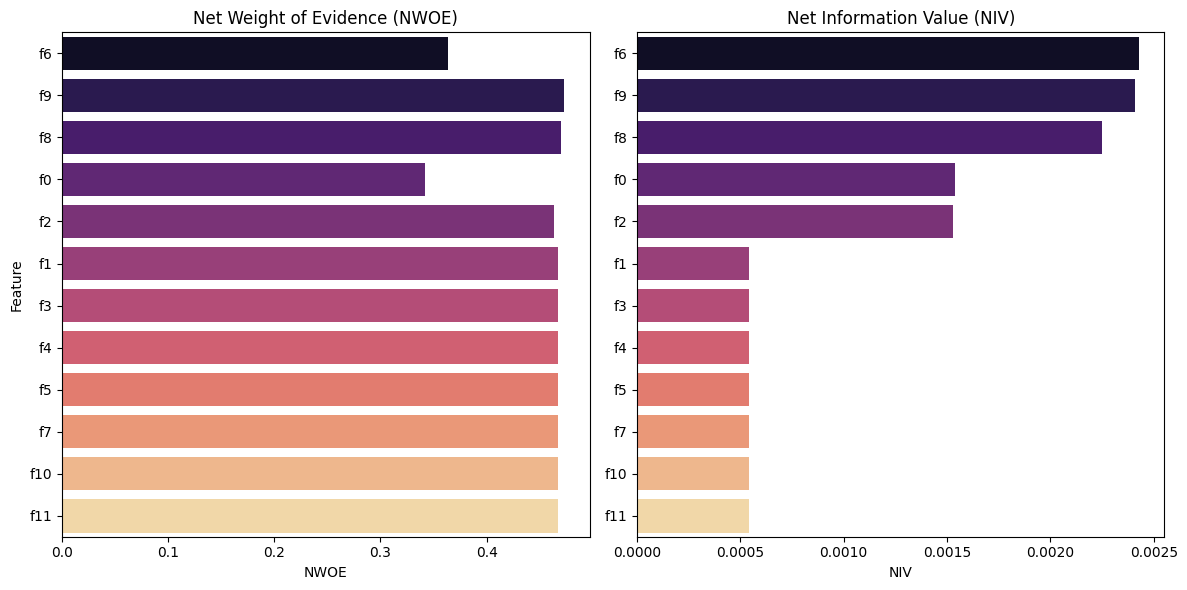

In [27]:
results_sorted = results.sort_values(by='NIV', ascending=False)

plt.figure(figsize=(12, 6))

# Barplot for NWOE
plt.subplot(1, 2, 1)
sns.barplot(data=results_sorted, x='NWOE', y='feature', palette='magma')
plt.title('Net Weight of Evidence (NWOE)')
plt.xlabel('NWOE')
plt.ylabel('Feature')

# Barplot for NIV
plt.subplot(1, 2, 2)
sns.barplot(data=results_sorted, x='NIV', y='feature', palette='magma')
plt.title('Net Information Value (NIV)')
plt.xlabel('NIV')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Самые важные признаки для uplift-модели по NIV: f6, f9 и f8**

Эти признаки, вероятно, наиболее полезны для построения модели uplift

Признаки с низким NIV показывают некоторое направление, но не дают большой предсказательной силы — их вклад в модель будет небольшой